In [6]:

import pandas as pd
import numpy as np
import random 
from sklearn.preprocessing import LabelEncoder
import optuna
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CSV_PATH="cleaned_songs.csv"
df=pd.read_csv(CSV_PATH)
random_seed=47

In [3]:
df

,author,context,additional_context,song_title,song_text,source
0,Петре М. Андреевски,"Петок е прекрасен ден за читање поезија, па за...",NaN,Наопачно оро,Наопачно оро – Петре М. Андреевски\n\nКој игра...,song_kafe_kniga
1,Кочо Рацин,На 13 јуни 1943 година загинал Кочо Рацин. И п...,NaN,Балада за непознатиот,Балада за непознатиот – Кочо Рацин\n\nНатаму –...,song_kafe_kniga
2,Гане Тодоровски,На 22 мај 2010 година починал еден од најголем...,NaN,Молитва,Молитва – Гане Тодоровски\n\n(пред крајот на г...,song_kafe_kniga
3,Владо Урошевиќ,Денес на блогот читаме прекрасни македонски ст...,NaN,Слобода,Слобода – Влада Урошевиќ\n\nПтица со пет крила...,song_kafe_kniga
4,Кочо Рацин,"Денес е 1 Мај, Меѓународен ден на трудот. Во т...",NaN,Копачите,Копачите – Кочо Рацин\n\nСе к’ти ноќта црна!\n...,song_kafe_kniga
...,...,...,...,...,...,...
1194,Ристо Лазаров,NaN,Аргетинци,ЕВИТА,ЕВИТА \n \nветриштата од западните пампаси \...,СРЕДЕ
1195,Ристо Лазаров,NaN,Аргетинци,ГАРДЕЛ,ГАРДЕЛ \n \nа зина уста \nа птици ќе си ги рас...,СРЕДЕ
1196,Ристо Лазаров,NaN,Аргетинци,БОРХЕС,БОРХЕС \n \nза жал светот с# уште е стварен \...,СРЕДЕ
1197,Ристо Лазаров,NaN,Аргетинци,САБАТО,САБАТО \n \nво сантос лагоресу законите на фи...,СРЕДЕ


author
Блаже Конески           182
Пијан Славеј            160
Ефтим Клетников         135
Славко Јаневски          70
Владо Урошевиќ           61
Катица Ќулавкова         60
Братислав Ташковски      55
Веле Смилевски           51
Ристо Лазаров            48
Адам Гајтани             47
Бранко Цветкоски         41
Петре М. Андреевски      41
Милош Линдро             40
Тодор Чаловски           31
Ацо Шопов                31
Анте Поповски            21
Гане Тодоровски          19
Богомил Ѓузел            19
Игор Исаковски           15
Матеја Матевски          14
Кочо Рацин               13
Лилјана Дирјан            7
Јосип Коцев               6
Ацо Караманов             4
Тихомир Јанчовски         4
Коле Неделковски          4
Видое Подгорец            3
Раде Силјан               3
Константин Миладинов      3
Цане Андреевски           2
Ванчо Николески           2
Никола Вапцаров           2
Рајко Жинзифов            1
Никола Маџиров            1
Јован Котески             1
Радован Павло

/tmp/ipykernel_43985/1049885675.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")


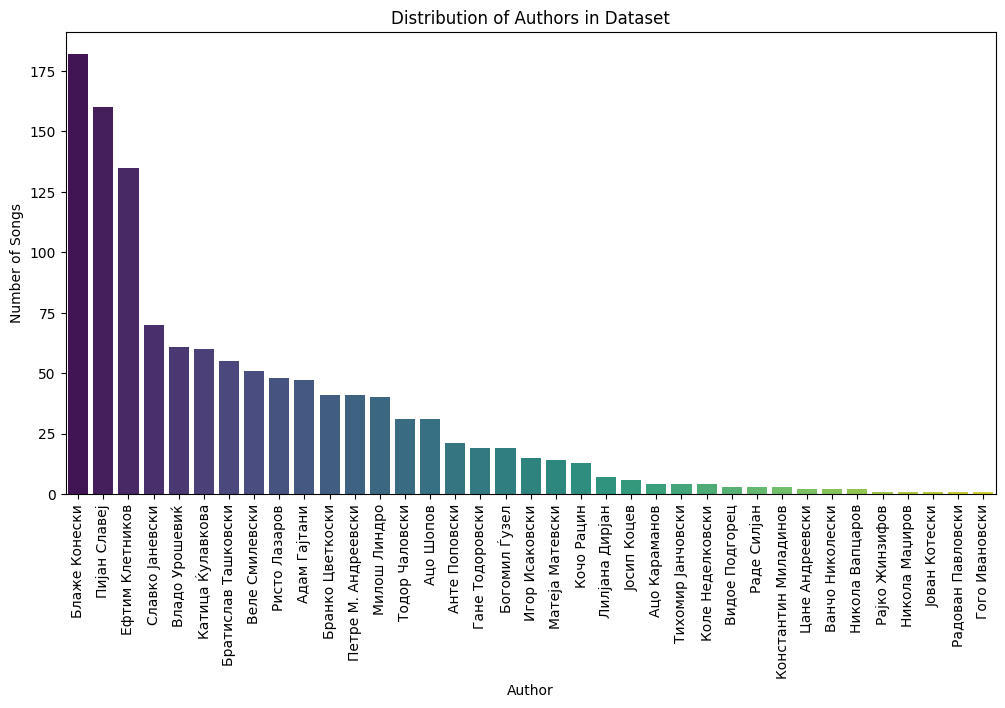

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


author_counts = df["author"].value_counts()

print(author_counts)
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.index, y=author_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Author")
plt.ylabel("Number of Songs")
plt.title("Distribution of Authors in Dataset")
plt.show()


In [8]:
len_df=df.copy()

len_df['char_count']=len_df['song_text'].str.len()
result_char = len_df.groupby("author")[["char_count"]].sum().reset_index().sort_values('char_count',ascending=False) 
result_char
    

,author,char_count
6,Блаже Конески,85707
28,Пијан Славеј,58934
7,Богомил Ѓузел,57509
16,Ефтим Клетников,56526
33,Славко Јаневски,54619
18,Катица Ќулавкова,51382
27,Петре М. Андреевски,45774
13,Владо Урошевиќ,33942
2,Адам Гајтани,32600
32,Ристо Лазаров,29858


In [9]:
len_df['word_count']=len_df['song_text'].str.split().str.len()
result_word = len_df.groupby("author")[["word_count"]].sum().reset_index().sort_values('word_count',ascending=False) 
result_word
    

,author,word_count
6,Блаже Конески,15589
28,Пијан Славеј,10701
16,Ефтим Клетников,9769
7,Богомил Ѓузел,9708
33,Славко Јаневски,9350
18,Катица Ќулавкова,8237
27,Петре М. Андреевски,8205
13,Владо Урошевиќ,5425
2,Адам Гајтани,5331
32,Ристо Лазаров,4763


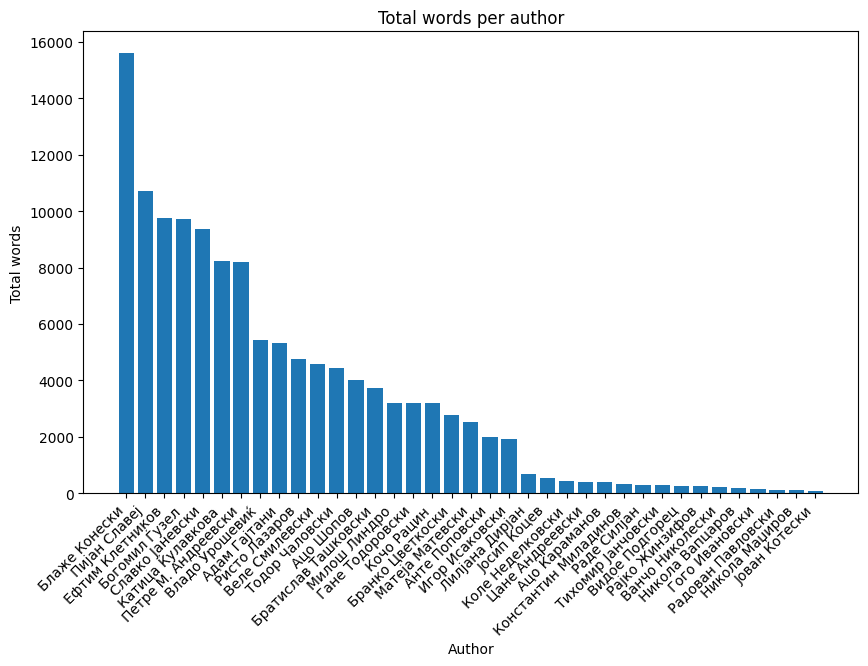

In [6]:
plt.figure(figsize=(10,6))
plt.bar(result_word["author"], result_word["word_count"])
plt.title("Total words per author")
plt.xlabel("Author")
plt.ylabel("Total words")
plt.xticks(rotation=45,ha='right')
plt.show()

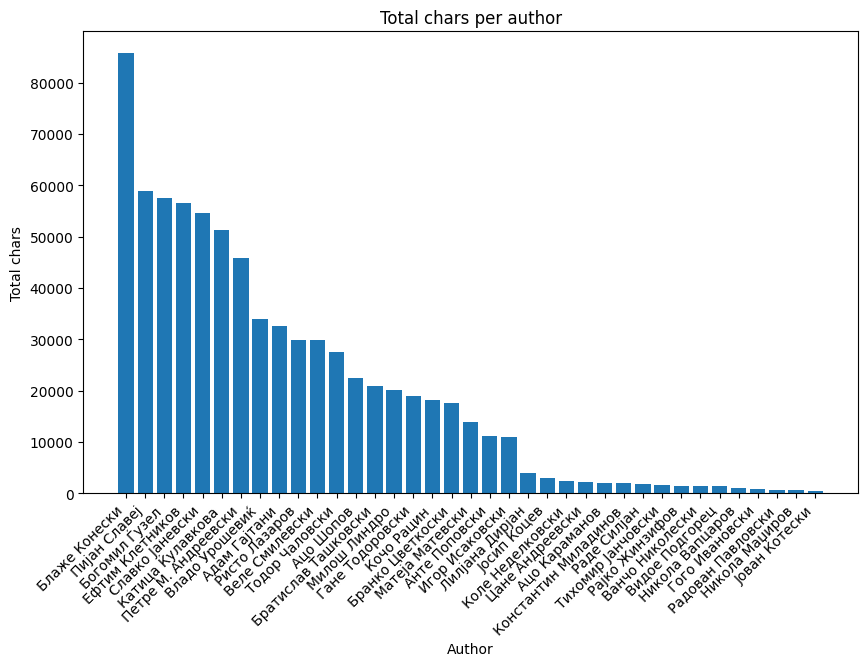

In [7]:
plt.figure(figsize=(10,6))
plt.bar(result_char["author"], result_char["char_count"])
plt.title("Total chars per author")
plt.xlabel("Author")
plt.ylabel("Total chars")
plt.xticks(rotation=45,ha='right')
plt.show()

In [8]:
print(f'Word count described:\n{len_df['word_count'].describe()}')
print(f'Total word count: {len_df['word_count'].sum()}')

Word count described:
count    1199.000000
mean      106.363636
std        97.029862
min         1.000000
25%        58.000000
50%        83.000000
75%       118.500000
max      1240.000000
Name: word_count, dtype: float64
Total word count: 127530


In [9]:
print(f'Char count described:\n{len_df['char_count'].describe()}')
print(f'Total char count: {len_df['char_count'].sum()}')

Char count described:
count    1199.000000
mean      621.750626
std       565.858197
min        57.000000
25%       329.000000
50%       492.000000
75%       703.500000
max      7430.000000
Name: char_count, dtype: float64
Total char count: 745479


Testing  of the models.

In [12]:
train, test = train_test_split(df, test_size=0.3, random_state=random_seed)
train_x, train_y = train['song_text'], train['author']
test_x, test_y = test['song_text'], test['author']
all_authors=df['author']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_x).toarray()
X_test = vectorizer.transform(test_x).toarray()

label_encoder = LabelEncoder()
label_encoder.fit(all_authors)
train_y_encoded = label_encoder.transform(train_y)

mask = test_y.isin(train_y)
X_test = X_test[mask.values]
test_y = test_y[mask]
test_y_encoded = label_encoder.transform(test_y)

num_classes = len(label_encoder.classes_)


def objective(trial):
    n_layers = trial.suggest_int("n_layers", 1, 15)
    neurons = trial.suggest_categorical("neurons", [64, 128, 256, 512,1024])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "elu"])
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    epochs = trial.suggest_int("epochs", 5, 100) 

    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    for _ in range(n_layers):
        model.add(layers.Dense(neurons, activation=activation))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation="softmax"))

    if optimizer_name == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

   
    model.fit(
        X_train, train_y_encoded,
        validation_data=(X_test, test_y_encoded),
        epochs=epochs,
        batch_size=32,
        verbose=0
    )

    y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
    f1 = f1_score(test_y_encoded, y_pred, average="weighted")
    return f1


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Best F1 Score:", study.best_value)
print("Best hyperparameters:", study.best_params)


[I 2025-09-24 15:11:01,244] A new study created in memory with name: no-name-063bdc57-7124-4361-a707-c640fefb330a
[I 2025-09-24 15:11:39,654] Trial 0 finished with value: 0.2208795400249654 and parameters: {'n_layers': 15, 'neurons': 256, 'activation': 'elu', 'dropout_rate': 0.14831495705486178, 'optimizer': 'adam', 'lr': 0.0028483401174322336, 'epochs': 61}. Best is trial 0 with value: 0.2208795400249654.
[I 2025-09-24 15:13:02,800] Trial 1 finished with value: 0.3485475709108036 and parameters: {'n_layers': 6, 'neurons': 512, 'activation': 'relu', 'dropout_rate': 0.4397962714360868, 'optimizer': 'adam', 'lr': 0.00012886337339475005, 'epochs': 79}. Best is trial 1 with value: 0.3485475709108036.
[I 2025-09-24 15:13:31,045] Trial 2 finished with value: 0.3717801913389449 and parameters: {'n_layers': 8, 'neurons': 256, 'activation': 'elu', 'dropout_rate': 0.21728851898297724, 'optimizer': 'rmsprop', 'lr': 0.0030127585440450633, 'epochs': 61}. Best is trial 2 with value: 0.37178019133894

Best F1 Score: 0.646374359937885
Best hyperparameters: {'n_layers': 1, 'neurons': 256, 'activation': 'relu', 'dropout_rate': 0.12585953325685081, 'optimizer': 'rmsprop', 'lr': 0.008932202078992958, 'epochs': 97}


64 min 29 seconnds 

Epoch 1/97


W0000 00:00:1758730467.713606    6340 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.2145 - loss: 2.8945 - val_accuracy: 0.3492 - val_loss: 2.4307
Epoch 2/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7557 - loss: 1.3933 - val_accuracy: 0.4637 - val_loss: 1.8243
Epoch 3/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9702 - loss: 0.3133 - val_accuracy: 0.5978 - val_loss: 1.4887
Epoch 4/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9917 - loss: 0.0746 - val_accuracy: 0.6480 - val_loss: 1.3101
Epoch 5/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0261 - val_accuracy: 0.6508 - val_loss: 1.2384
Epoch 6/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0109 - val_accuracy: 0.6564 - val_loss: 1.2653
Epoch 7/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.6536 - val_loss: 1.2161
Epoch 8/97
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.6676 - val_loss: 1.

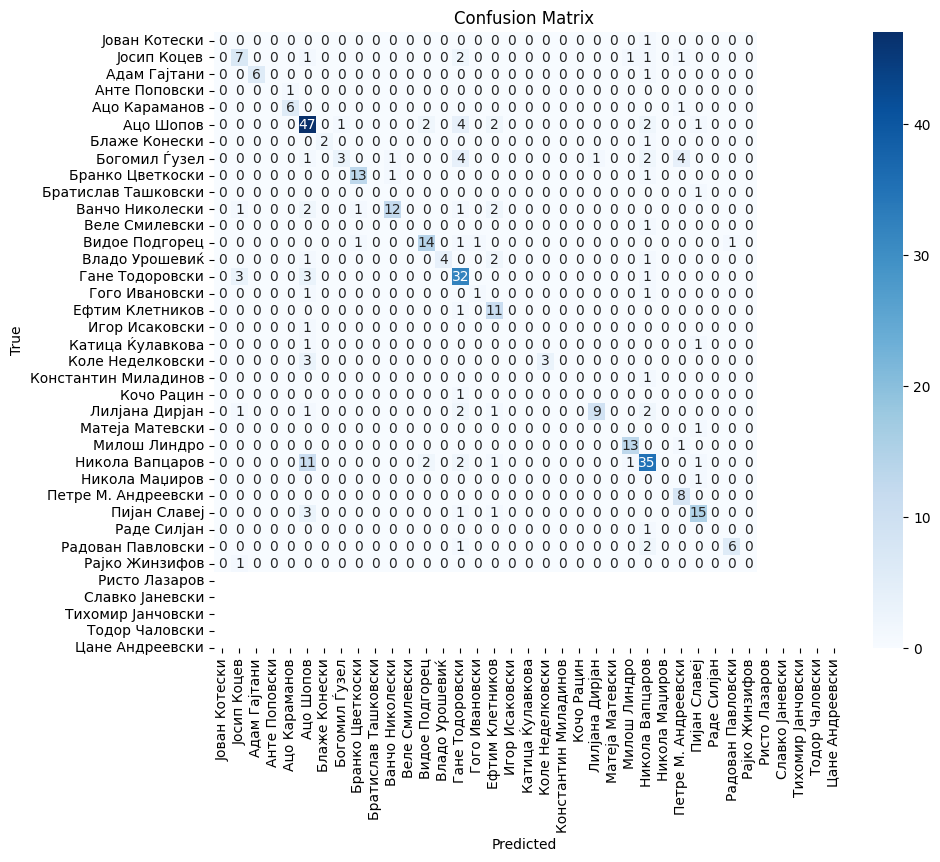

In [7]:

train, test = train_test_split(df, test_size=0.3, random_state=random_seed)
train_x, train_y = train['song_text'], train['author']
test_x, test_y = test['song_text'], test['author']
all_authors=df['author']

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_x).toarray()
X_test = vectorizer.transform(test_x).toarray()

label_encoder = LabelEncoder()
label_encoder.fit(all_authors)
train_y_encoded = label_encoder.transform(train_y)

mask = test_y.isin(train_y)
X_test = X_test[mask.values]
test_y = test_y[mask]
test_y_encoded = label_encoder.transform(test_y)

num_classes = len(label_encoder.classes_)
####
n_layers = 1
neurons = 256
activation = "tanh"
dropout_rate =0.480277251582165
optimizer_name = "adam"
lr =  0.007411508775215715
epochs = 26
#####
n_layers= 1 
neurons= 256
activation ='relu'
dropout_rate= 0.12585953325685081
optimizer = 'rmsprop'

lr= 0.008932202078992958 
epochs= 97

model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))

for _ in range(n_layers):
    model.add(layers.Dense(neurons, activation=activation))

model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(num_classes, activation="softmax"))


optimizer = keras.optimizers.RMSprop(learning_rate=lr)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


history = model.fit(
    X_train, train_y_encoded,
    validation_data=(X_test, test_y_encoded),
    epochs=epochs,
    batch_size=32,
    verbose=1
)

y_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
f1 = f1_score(test_y_encoded, y_pred, average="weighted")
f1_per_author = f1_score(test_y_encoded, y_pred, average=None)
authors = label_encoder.classes_
for author, score in zip(authors, f1_per_author):
    print(f"{author}: F1 = {score:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")

cm = confusion_matrix(test_y_encoded, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Analysis, tryint to calculate author effectivness.

In [ ]:

results_df = df.groupby('author').agg(
    char_count=('song_text', lambda x: x.str.len().sum()),
    word_count=('song_text', lambda x: x.str.split().str.len().sum()),
    num_songs=('song_text', 'count')
).reset_index()

f1_dict = dict(zip(authors, f1_per_author))

results_df['f1_score'] = results_df['author'].map(f1_dict)

missing_f1 = results_df[results_df['f1_score'].isna()]['author'].tolist()
if missing_f1:
    print(f"Warning: No F1 scores for authors: {missing_f1}")

max_songs = results_df['num_songs'].max()
max_words = results_df['word_count'].max()
max_chars = results_df['char_count'].max()

results_df['norm_songs'] = results_df['num_songs'] / max_songs
results_df['norm_words'] = results_df['word_count'] / max_words
results_df['norm_chars'] = results_df['char_count'] / max_chars


r#esults_df['composite_size'] = (results_df['norm_songs'] + results_df['norm_words'] + results_df['norm_chars']) / 3

results_df['expressiveness'] = results_df['f1_score'] / results_df['norm_words']

results_df['expressiveness'] = results_df['expressiveness'].replace([np.inf, -np.inf], np.nan)

if results_df['expressiveness'].notna().any():  
    expr_min = results_df['expressiveness'].min()
    expr_max = results_df['expressiveness'].max()
    if expr_max != expr_min: 
        results_df['expressiveness_normalized'] = (
            (results_df['expressiveness'] - expr_min) / (expr_max - expr_min)
        )
    else:
    
        results_df['expressiveness_normalized'] = 0
else:
    
    results_df['expressiveness_normalized'] = np.nan


results_df = results_df.sort_values(by='expressiveness_normalized', ascending=False, na_position='last')


results_df

,author,char_count,word_count,num_songs,f1_score,norm_songs,norm_words,norm_chars,composite_size,expressiveness,expressiveness_normalized
30,Радован Павловски,701,128,1,0.750000,0.005495,0.008211,0.008179,0.007295,102.812718,1.000000
25,Никола Вапцаров,1070,204,2,0.654206,0.010989,0.013086,0.012484,0.012187,53.682731,0.522141
10,Ванчо Николески,1460,232,2,0.727273,0.010989,0.014882,0.017035,0.014302,50.851025,0.494599
15,Гого Ивановски,898,148,1,0.400000,0.005495,0.009494,0.010478,0.008489,47.121770,0.458326
12,Видое Подгорец,1437,268,3,0.777778,0.016484,0.017192,0.016766,0.016814,46.258160,0.449926
4,Ацо Караманов,2016,389,4,0.857143,0.021978,0.024953,0.023522,0.023485,36.498230,0.354997
19,Коле Неделковски,2352,426,4,0.666667,0.021978,0.027327,0.027442,0.025582,26.059543,0.253466
22,Лилјана Дирјан,3883,679,7,0.692308,0.038462,0.043556,0.045306,0.042441,16.312185,0.158659
1,Јосип Коцев,2913,528,6,0.538462,0.032967,0.033870,0.033988,0.033608,16.021674,0.155834
8,Бранко Цветкоски,17516,2786,41,0.866667,0.225275,0.178716,0.204371,0.202787,4.273777,0.041569
